In [50]:
import numpy as np
import matplotlib.pyplot as plt

##=== Defining grid world constants

WORLD_H = 100
WORLD_W = 100

NUM_BLUE = 4
NUM_RED = 4
NUM_GRAY = 10

#PLOTTING = True
fig = plt.figure(figsize=(12, 12))

class Team:
    RED = 10
    BLUE = 50
    GRAY = 90
    
class MapCodes:
    RED_ZONE = 15
    BLUE_ZONE = 55
    OBSTACLE = 100
    AERIAL_DENIAL = 95
    RED_ZONE_XY = [[0,WORLD_W/2],[0,WORLD_H]]
    BLUE_ZONE_XY = [[WORLD_W/2,WORLD_W],[0,WORLD_H]]

In [51]:
class StateMachine(object):
    def __init__(self):
        self.state = None


In [52]:
class GridWorld(object):
        
    def __init__(self):
        self._grid_world = np.zeros([WORLD_W,WORLD_H], dtype=int)

        #zones and obstacles
        self._grid_world[:,0:int(WORLD_H/2)] = MapCodes.RED_ZONE
        self._grid_world[:,int(WORLD_H/2):WORLD_H] = MapCodes.BLUE_ZONE
        self._grid_world[10:35,10:35] = MapCodes.OBSTACLE
        self._grid_world[10:35,65:90] = MapCodes.OBSTACLE
        self._grid_world[65:90,10:35] = MapCodes.OBSTACLE
        self._grid_world[65:90,65:90] = MapCodes.OBSTACLE
        
    def get_map(self):
        return self._grid_world
        
    def plot_map(self):
        plt.imshow(self._grid_world)
        plt.show()
        
    def plot_all(self,agents):
        world_copy = np.copy(self._grid_world)
        for agent in agents:
            
            if agent.get_team() == Team.RED: world_copy[agent.get_location()] = 55
            if agent.get_team() == Team.BLUE: world_copy[agent.get_location()] = 5
            if agent.get_team() == Team.GRAY: world_copy[agent.get_location()] =75
       
        plt.imshow(world_copy)
        plt.show()
        plt.gcf().clear()

In [53]:
# agent classes

class Agent():
    
    def __init__(self, loc, team):
        try:
            self.x, self.y = loc
            self.team = team
        except:
            print("error: cannot initialize agent")
    
    def move(self,action):
        x,y = self.x, self.y
        if action == 0: 
            pass
        elif action == 1: 
            x -= 1
        elif action == 2:
            x += 1
        elif action == 3:
            y -= 1
        elif action == 4:
            y += 1
        else:
            print("error: wrong action selected")
        self.x, self.y = x, y
            
    def get_location(self):
        return self.x, self.y
    
    def get_team(self):
        return self.team
            
    def report_location(self):
        print("report: position x:%d, y:%d" % (self.x,self.y))
            

class GroundVehicle(Agent):
    
    def __init__(self,loc,team):
        Agent.__init__(self,loc,team)
        
class AerialVehicle(Agent):
    
    def __init__(self,loc,team):
        Agent.__init__(self,loc,team)

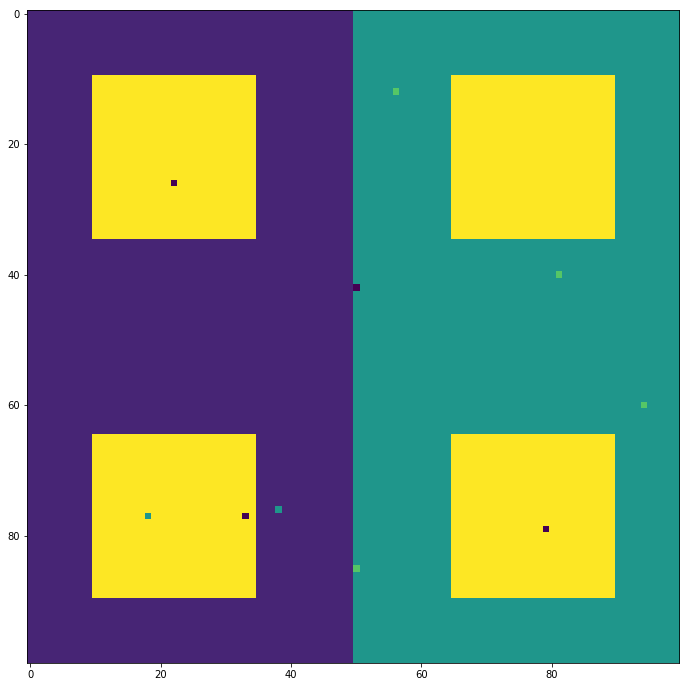

In [54]:
gr = GridWorld()
agents_list = []

for i in range(4):
    l = np.random.randint(0,100,[2])
    agents_list.append(GroundVehicle(l, Team.RED))
    l = np.random.randint(0,100,[2])
    agents_list.append(GroundVehicle(l, Team.BLUE))
    l = np.random.randint(0,100,[2])
    agents_list.append(GroundVehicle(l, Team.GRAY))

gr.plot_all(agents_list)